In [56]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA

from embed_utils import MyVQC
from var_utils import MyRYRZ

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from bc_utils import *

In [33]:
import itertools
num_bits = 6

x_train = []
y_train = []

for comb in itertools.product('01', repeat=num_bits):
    comb = [int(x) for x in comb]
    x_train.append(comb)
    y_train.append(sum(comb) % 2)
#     y_train.append(int(comb[0]))
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [34]:
num_qubit = num_bits // 3
x_st = []
for x in x_train:
    x_st.append(''.join(x.astype(str)))
    
x_st = np.array(x_st)

In [35]:
x_st

array(['000000', '000001', '000010', '000011', '000100', '000101',
       '000110', '000111', '001000', '001001', '001010', '001011',
       '001100', '001101', '001110', '001111', '010000', '010001',
       '010010', '010011', '010100', '010101', '010110', '010111',
       '011000', '011001', '011010', '011011', '011100', '011101',
       '011110', '011111', '100000', '100001', '100010', '100011',
       '100100', '100101', '100110', '100111', '101000', '101001',
       '101010', '101011', '101100', '101101', '101110', '101111',
       '110000', '110001', '110010', '110011', '110100', '110101',
       '110110', '110111', '111000', '111001', '111010', '111011',
       '111100', '111101', '111110', '111111'], dtype='<U6')

In [36]:
from qiskit import QuantumCircuit

In [37]:
training_input

{0: array(['000', '011', '101', '110'], dtype='<U3'),
 1: array(['001', '010', '100', '111'], dtype='<U3')}

In [38]:
num_qubit

2

In [43]:
from quantum_utils import CustomFeatureMap
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA
from qiskit.providers.aer import QasmSimulator
from qiskit.aqua import QuantumInstance

import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

seed = 10598

vqc_ordinal_log = []
def loss_history_callback(_, __, loss, ___):
    vqc_ordinal_log.append(loss)

feature_map = QuantumCircuit(num_qubit) # Empty Circuit
var_form = MyRYRZ(num_qubit, depth=4)

training_input = {
    0: x_st[y_train == 0],
    1: x_st[y_train == 1]
}

qsvm = MyVQC(SPSA(100), feature_map, var_form, training_input, callback=loss_history_callback)

backend_options = {"method": "statevector_gpu"}
backend = QasmSimulator(backend_options)

quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed,optimization_level=3)


result = qsvm.run(quantum_instance)

y_pred_train = qsvm.predict(x_st)[1]


# F1 score
acc_f1_train = (np.mean(y_pred_train == y_train), f1_score(y_train, y_pred_train))


# qsvm.save_model(f'models/titanic_QRAC_mapped_no13_implementation_fold_{ro}')


/home/hpc/anaconda3/envs/tf-quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The qiskit.aqua.components.variational_forms.RYRZ object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.EfficientSU2 (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.
/home/hpc/anaconda3/envs/tf-quantum/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
/home/hpc/Desktop/Napat_work/qc_group_project/embed_utils.py:545: UserWarning: The feature map has no parameters that can be optimized to represent the 

2020-08-23 18:25:25,637:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:26,673:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:27,506:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:28,465:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:28,636:qiskit.aqua.components.optimizers.spsa:DEBUG: calibration step # 15 of 20
2020-08-23 18:25:29,276:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:30,375:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:31,154:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:25:32,104:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the N

2020-08-23 18:26:04,883:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 13: 0.9569403
2020-08-23 18:26:04,884:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 13: 1.0882093
2020-08-23 18:26:05,539:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:06,599:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:06,866:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 14: 0.8071557
2020-08-23 18:26:06,867:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 14: 0.8612126
2020-08-23 18:26:07,584:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:08,657:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:08,925:qiskit.aqua.componen

2020-08-23 18:26:37,763:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 30: 0.6706762
2020-08-23 18:26:38,463:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:39,686:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:39,860:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 31: 0.6548950
2020-08-23 18:26:39,860:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 31: 0.6779831
2020-08-23 18:26:40,496:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:41,518:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:26:41,718:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 32: 0.6504966
2020-08-23 18:26:41,719:qiskit.aqua.componen

2020-08-23 18:27:11,334:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:12,382:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:12,575:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 48: 0.6547902
2020-08-23 18:27:12,576:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 48: 0.6202457
2020-08-23 18:27:13,216:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:14,419:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:14,613:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 49: 0.6230222
2020-08-23 18:27:14,613:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 49: 0.6208563
2020-08-23 18:27:15,244:qiskit.aqua.utils.ru

2020-08-23 18:27:45,134:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:45,308:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 65: 0.6128035
2020-08-23 18:27:45,309:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 65: 0.5849000
2020-08-23 18:27:45,930:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:46,922:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:47,121:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 66: 0.5812914
2020-08-23 18:27:47,121:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 66: 0.5992580
2020-08-23 18:27:47,789:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:27:49,006:qiskit.aqua.utils.ru

2020-08-23 18:28:17,726:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 82: 0.5281252
2020-08-23 18:28:17,727:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 82: 0.5535266
2020-08-23 18:28:18,537:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:19,476:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:19,661:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 83: 0.5362669
2020-08-23 18:28:19,662:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 83: 0.5463544
2020-08-23 18:28:20,348:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:21,405:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:21,588:qiskit.aqua.componen

2020-08-23 18:28:50,575:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 99: 0.5203819
2020-08-23 18:28:51,462:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-23 18:28:51,643:qiskit.aqua.components.optimizers.spsa:DEBUG: Final objective function is: 0.5136153
2020-08-23 18:28:52,340:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.


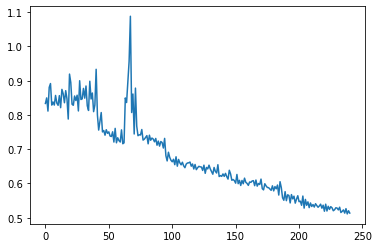

In [46]:
plt.plot(vqc_ordinal_log)

In [30]:
qsvm.construct_circuit('110', np.array([2 for i in range(18)])).draw()

┌─────────────┐┌───────────┐┌───────────┐┌───────┐ ░  ░  ░  ░  ░  ░  ░  ░ »
q_0: ┤ circuit1023 ├┤ U3(2,2,0) ├┤ U3(2,0,0) ├┤ U1(2) ├─░──░──░──░──░──░──░──░─»
     └─────────────┘└───────────┘└───────────┘└───────┘ ░  ░  ░  ░  ░  ░  ░  ░ »
c_0: ══════════════════════════════════════════════════════════════════════════»
                                                                               »
«      ░ 
«q_0: ─░─
«      ░ 
«c_0: ═══
«

In [44]:
result

{'num_optimizer_evals': None,
 'min_val': 0.5136153235858316,
 'opt_params': array([-0.93708844, -3.05307024, -3.39536786, -6.20729495,  2.72791213,
         4.17536549, -2.26133191,  2.65852434,  1.99452056, -0.17574343,
         2.57636654, -2.43616345, -2.12489909,  0.00742505,  3.21982382,
        -1.60457892, -2.22016763, -3.51689789, -1.38351227,  3.15870132,
        -4.58867349,  0.06818234,  0.14570487,  4.13592778,  0.67214873,
        -3.97314604, -1.3567407 ,  0.13678001, -1.27824855,  2.60078556,
        -2.29449291, -0.77599605,  2.166544  ,  3.32912227,  2.59597286,
         1.05770581, -5.05728945,  0.9846406 ,  2.30504427,  0.67550717,
         0.22682823,  1.8679817 , -0.03941176, -4.0589281 ,  1.50312933,
        -2.78951348,  2.1863096 , -4.26811761, -0.17916239, -1.5931047 ,
         1.94774883,  2.13782603]),
 'eval_time': 231.22380137443542,
 'eval_count': 241,
 'training_loss': 0.5136153235858316,
 'predicted_probs': array([[0.63085938, 0.36914062],
        [0.17

In [45]:
np.mean(y_train == result['predicted_labels'])

0.828125

# Breast cancer

In [52]:
X_df, y_df = get_breast_cancer_data()
X, y = X_df.values, y_df.values

5-fold Random Forest Classification
Mean Accuracy: 71.65%
Mean F1 score: 40.90%
The four most important features are TUMOR-SIZE, BREAST-QUAD, DEG-MALIG and AGE respectively.


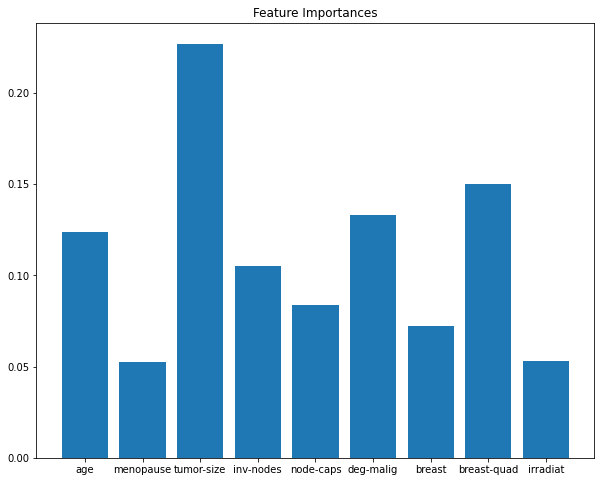

In [53]:
np.random.seed(123123)
selected_features_num = 4
_, __, feature_importances_list = kfold_randomforest(X, y)

# Feature selection from feature importances
selected_features = X_df.columns[sorted(range(X.shape[1]), key=lambda i: np.mean(feature_importances_list, axis=0)[i])[:-selected_features_num-1:-1]]
print('The four most important features are', ", ".join(selected_features[:-1]).upper() + f' and {selected_features[-1].upper()} respectively.')

# Visualize the feature importances
plt.figure(figsize=(10,8))
plt.bar(X_df.columns, np.mean(feature_importances_list, axis=0))
plt.title('Feature Importances')
plt.show()

In [62]:
from zipfile import ZipFile, ZIP_DEFLATED

def train_vqc(feature_map, \
              var_form, \
              backend, \
              optimizer, \
              seed, \
              X_train, X_test, y_train, y_test, \
              model_filename, \
              shots=1024):
  
    # Input preparation
    # Input dict
    training_input, test_input = get_input_dict_for_VQC(X_train, X_test, y_train, y_test)
    # Quantum instance
    quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=seed, seed_transpiler=seed,optimization_level=3)
    # Final zip file for temp models and its working directory
    wdir = '/'.join(model_filename.split('/')[:-1])
    print('='*100 + f'\nWorking directory: {wdir}\n' + '='*100)  
#     os.chdir(wdir)
    temp_model_zip_filename = model_filename.split('.')[0] + '_temp.zip'
    final_model_filename = model_filename.split('.')[0] + '_final.npz'
    zip_obj = ZipFile(temp_model_zip_filename, 'w')

    # Callback function for collecting models' parameters and losses along the way
    default_training_loss_list, training_loss_list, validation_loss_list = [], [], []
    def callback_collector(eval_count, model_params, loss, ___):
        # Collect default training loss
        default_training_loss_list.append(loss)
        # Save a temp model
        temp_model_filename = model_filename.split('.')[0] + f'_evalcount{eval_count+1}.npz'
        np.savez(temp_model_filename, opt_params = model_params)
        zip_obj.write(temp_model_filename, compress_type=ZIP_DEFLATED)
        # Load the temp model
        vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
        vqc_val.load_model(temp_model_filename)
        os.remove(temp_model_filename)
        # Collect validation loss
        y_test_prob = vqc_val.predict(X_test, quantum_instance)[0]
        val_loss = -np.mean(y_test*np.log(y_test_prob[:,1]) + (1 - y_test)*np.log(y_test_prob[:,0]))
        validation_loss_list.append(val_loss)
#         # Collect training loss
#         y_train_prob = vqc_val.predict(X_train, quantum_instance)[0]
#         train_loss = -np.mean(y_train*np.log(y_train_prob[:,1]) + (1 - y_train)*np.log(y_train_prob[:,0]))
#         training_loss_list.append(train_loss)

    # Run VQC
    vqc = MyVQC(optimizer, feature_map, var_form, training_input, test_input, callback=callback_collector)
    result = vqc.run(quantum_instance)
    clear_output()
    print('Trained successfully!')
    vqc.save_model(final_model_filename)
    zip_obj.close()

    # Evaluate a final model
    y_train_pred, y_test_pred = vqc.predict(X_train, quantum_instance)[1], vqc.predict(X_test,  quantum_instance)[1]
    acc_train, f1_train = np.mean(y_train_pred==y_train), f1_score(y_train, y_train_pred)
    acc_test, f1_test = np.mean(y_test_pred==y_test), f1_score(y_test, y_test_pred)
    clear_output()
    print(f'Final accuracy (test set): {acc_test:.2%} | Final accuracy (training set): {acc_train:.2%}')
    print(f'Final F1 score (test set): {f1_test:.2%} | Final F1 score (training set): {f1_train:.2%}')
    print(f'Final model is saved at {final_model_filename}.\nTemp models are saved at {temp_model_zip_filename}.')

    # Save results
    result['Default training losses'] = np.array(default_training_loss_list)
#     result['Training losses'] = np.array(training_loss_list)
    result['Validation losses'] = np.array(validation_loss_list)
    result['Training F1 score'], result['Training accuracy'] = f1_train, acc_train
    result['Test F1 score'], result['Test accuracy'] = f1_test, acc_test

    return result

def kfold_vqc(feature_map, \
              var_form, \
              backend, \
              optimizer_gen, \
              seed, \
              X, y, \
              model_filename, \
              result_filename, \
              k=5, \
              shots=1024, \
              seed_kfold=123123, \
              double_positive_data=True,
              one_third_positive_data=False):

    print('='*100)
    print(f'{k}-fold VQC Classification')
    # Final zip file for saving and its directory
    wdir = '/'.join(model_filename.split('/')[:-1])
    print('='*100 + f'\nWorking directory: {wdir}\n' + '='*100)
#     os.chdir(wdir)
    zip_filename = model_filename.split('.')[0] + '.zip'
    print(zip_filename)
    zip_obj = ZipFile(zip_filename, 'w')
    # Final result initialization (dict)
    result = dict()
    result['Default training losses'], result['Training losses'], result['Validation losses'] = [], [], []
    result['Default final test losses'], result['Default test accuracies'] = [], []
    result['Training accuracies'], result['Test accuracies'], result['Test F1 scores'], result['Training F1 scores'] = [], [], [], []
    np.random.seed(seed_kfold)
    for (fold, (train_id, test_id)) in enumerate(KFold(n_splits=k, shuffle=True).split(X), start=1):
        print('='*100 + f'\nFold number {fold}\n' + '='*100)
        # Split data
        X_train, X_test, y_train, y_test = X[train_id], X[test_id], y[train_id], y[test_id]
        # Double positive data
        if double_positive_data:
            X_train, y_train = np.concatenate((X_train, X_train[y_train==1]), axis=0), np.hstack((y_train, np.ones(np.sum(y_train==1))))
        elif one_third_positive_data:
            X_train, y_train = np.concatenate([X_train, X_train[:len(X_train)//3]], axis=0), np.hstack((y_train, np.ones(len(X_train)//3)))
        # Train a model
        model_filename_fold = model_filename.split('.')[0] + f'_foldnumber{fold}.npz'
        optimizer = optimizer_gen()
        result_1fold = train_vqc(feature_map, \
                                var_form, \
                                backend, \
                                optimizer, \
                                seed, \
                                X_train, X_test, y_train, y_test, \
                                model_filename_fold, \
                                shots)
        # Save the trained model to the final zip file 
        # Final model
        final_model_filename_fold = model_filename_fold.split('.')[0] + '_final.npz'
        zip_obj.write(final_model_filename_fold, compress_type=ZIP_DEFLATED)
        os.remove(final_model_filename_fold)
        # Temp model
        temp_model_zip_filename_fold = model_filename_fold.split('.')[0] + '_temp.zip'
        zip_obj.write(temp_model_zip_filename_fold, compress_type=ZIP_DEFLATED)
        os.remove(temp_model_zip_filename_fold)
        # Collect results
        result['Default training losses'].append(result_1fold['Default training losses'])
#         result['Training losses'].append(result_1fold['Training losses'])
        result['Validation losses'].append(result_1fold['Validation losses'])
        result['Default final test losses'].append(result_1fold['testing_loss'])
        result['Training accuracies'].append(result_1fold['Training accuracy'])
        result['Test accuracies'].append(result_1fold['Test accuracy'])
        result['Training F1 scores'].append(result_1fold['Training F1 score'])
        result['Test F1 scores'].append(result_1fold['Test F1 score'])
        result['Default test accuracies'].append(result_1fold['testing_accuracy'])

    # Average accuracies and f1 scores
    zip_obj.close()
    dict_items_without_meanvalues = list(result.items())
    for key, value in dict_items_without_meanvalues:
        result['Mean ' + key.lower()] = np.mean(value, axis=0)
    # Make all numpy arrays
    for key, value in result.items():
        if type(value)==list:
            result[key] = np.array(value)
    # Save final results
    with open(result_filename, 'wb') as f:
        pickle.dump(result, f)
    clear_output()
    print('='*100)
    print('='*35 + f' {k}-fold VQC Classification ' + '='*35)
    print(f"Mean training accuracy: {result['Mean training accuracies']:.2%} | Mean test accuracy: {result['Mean test accuracies']:.2%}")
    print(f"Mean training F1 score: {result['Mean training f1 scores']:.2%} | Mean test F1 score: {result['Mean test f1 scores']:.2%}")
    print(f'All models are saved at {zip_filename}.\nResults are saved at {result_filename}.')
    print('='*100)

    return result

In [ ]:
# Preparing data
X, y = X_df[selected_features].values, y_df.values
X_binary_encoded = binary_encoder(X)

# Preparing inputs for feeding VQC
num_qubit = len(X_binary_encoded[0])//3
# Custom Feature Map
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 4)
backend = QasmSimulator({"method": "statevector_gpu"})

# Test Run VQC (CustomFeatureMap)
seed, epoch = 10598, 300
optimizer = lambda: SPSA(epoch)
result = kfold_vqc(feature_map, \
                    var_form, \
                    backend, \
                    optimizer, \
                    seed, \
                    X_binary_encoded, y, \
                    'models/self_learn_encoder_model.zip', \
                    'results/self_learn_encoder_results.pkl', \
                    k=5)

/home/hpc/anaconda3/envs/tf-quantum/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The qiskit.aqua.components.variational_forms.RYRZ object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.EfficientSU2 (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.
  if __name__ == '__main__':
2020-08-24 11:47:51,085:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.14.2
Backend: 'qasm_simulator (None)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'swap', 'ccx', 'unitary', 'diagonal', 'initialize', 'cu1', 'cu2', 'cu3', 'cswap', 'mcx', 'mcy', 'mcz', 'mcu1', 'mcu2', 'mcu3', 'mcswap', 'multiplexer', 'kraus', 'roerror'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': 3}
RunConfig(max_credits=10, seed_simulator=10598, shots=1024)
{'t

2020-08-24 11:47:51,095:qiskit.aqua.components.optimizers.spsa:DEBUG: calibration step # 0 of 25


5-fold VQC Classification
Working directory: models
models/self_learn_encoder_model.zip
Fold number 1
Working directory: models


2020-08-24 11:48:02,806:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
/home/hpc/anaconda3/envs/tf-quantum/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
2020-08-24 11:48:06,791:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:48:17,127:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:48:20,687:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:48:32,614:qiskit.aqua.utils.run_circuits:INFO: Can

2020-08-24 11:56:27,146:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:56:39,010:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:56:42,666:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:56:54,659:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:56:58,742:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:57:10,822:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:57:14,573:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:57:27,671:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 11:57:32,268:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj val

2020-08-24 12:04:00,312:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 5: 0.7120166
2020-08-24 12:04:00,328:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 5: 0.7084839
2020-08-24 12:04:12,464:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:04:16,347:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:04:29,932:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:04:33,154:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:04:33,382:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 6: 0.7139944
2020-08-24 12:04:33,383:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 6: 0.7070938
2020-08-24 12:04:48,533:qiskit.aqua.utils.run_ci

2020-08-24 12:10:51,083:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:10:55,354:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:10:55,790:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 17: 0.6727913
2020-08-24 12:10:55,791:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 17: 0.6986600
2020-08-24 12:11:08,936:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:11:12,360:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:11:26,481:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:11:29,900:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:11:30,118:qiskit.aqua.components.optimizers.spsa

2020-08-24 12:17:26,226:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:17:29,526:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:17:44,777:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:17:48,840:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:17:49,061:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 29: 0.6379277
2020-08-24 12:17:49,062:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 29: 0.6301017
2020-08-24 12:18:03,209:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:18:06,584:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:18:19,921:qiskit.aqua.utils.run_circuits:INFO: C

2020-08-24 12:24:06,130:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 40: 0.6189998
2020-08-24 12:24:06,131:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 40: 0.6211078
2020-08-24 12:24:18,595:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:24:22,847:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:24:33,816:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:24:38,267:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:24:38,583:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 41: 0.6240759
2020-08-24 12:24:38,584:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 41: 0.6160128
2020-08-24 12:24:51,852:qiskit.aqua.utils.ru

2020-08-24 12:30:52,959:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:30:57,015:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:30:57,448:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 52: 0.6148207
2020-08-24 12:30:57,460:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 52: 0.6109293
2020-08-24 12:31:10,976:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:31:14,284:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:31:29,537:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:31:33,606:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:31:33,837:qiskit.aqua.components.optimizers.spsa

2020-08-24 12:37:10,842:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:37:13,878:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:37:22,466:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:37:25,674:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:37:25,927:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 64: 0.6061258
2020-08-24 12:37:25,928:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 64: 0.6035340
2020-08-24 12:37:34,174:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:37:37,280:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:37:46,023:qiskit.aqua.utils.run_circuits:INFO: C

2020-08-24 12:41:48,573:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 75: 0.5944730
2020-08-24 12:41:48,574:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 75: 0.6034910
2020-08-24 12:41:56,910:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:42:00,085:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:42:08,670:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:42:11,833:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:42:12,088:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 76: 0.5924137
2020-08-24 12:42:12,088:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 76: 0.6014729
2020-08-24 12:42:20,894:qiskit.aqua.utils.ru

2020-08-24 12:46:31,739:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:46:34,959:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:46:35,273:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 87: 0.5905507
2020-08-24 12:46:35,274:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 87: 0.5906535
2020-08-24 12:46:43,989:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:46:46,963:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:46:56,155:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:46:59,329:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:46:59,676:qiskit.aqua.components.optimizers.spsa

2020-08-24 12:51:07,836:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:51:11,156:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:51:20,557:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:51:23,540:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:51:23,769:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 99: 0.5895075
2020-08-24 12:51:23,769:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 99: 0.5813125
2020-08-24 12:51:32,013:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:51:35,112:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:51:43,927:qiskit.aqua.utils.run_circuits:INFO: C

2020-08-24 12:55:48,053:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 110: 0.5786506
2020-08-24 12:55:48,053:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 110: 0.5835417
2020-08-24 12:55:56,323:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:55:59,404:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:56:08,485:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:56:11,493:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 12:56:11,741:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 111: 0.5829098
2020-08-24 12:56:11,742:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 111: 0.5844039
2020-08-24 12:56:20,690:qiskit.aqua.util

2020-08-24 13:00:33,208:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:00:36,338:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:00:36,580:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 122: 0.5795221
2020-08-24 13:00:36,581:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 122: 0.5799090
2020-08-24 13:00:45,252:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:00:48,322:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:00:56,986:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:01:00,273:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:01:00,587:qiskit.aqua.components.optimizers.sp

2020-08-24 13:05:08,516:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:05:11,736:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:05:21,161:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:05:24,296:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:05:24,539:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 134: 0.5802554
2020-08-24 13:05:24,540:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 134: 0.5737920
2020-08-24 13:05:32,948:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:05:36,222:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:05:45,373:qiskit.aqua.utils.run_circuits:INFO:

2020-08-24 13:09:49,921:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 145: 0.5781408
2020-08-24 13:09:49,922:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 145: 0.5650770
2020-08-24 13:09:58,370:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:10:01,521:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:10:10,103:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:10:13,214:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:10:13,440:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 146: 0.5706765
2020-08-24 13:10:13,440:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 146: 0.5663231
2020-08-24 13:10:22,296:qiskit.aqua.util

2020-08-24 13:14:34,122:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:14:37,204:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:14:37,445:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 157: 0.5706415
2020-08-24 13:14:37,445:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 157: 0.5665523
2020-08-24 13:14:46,001:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:14:49,053:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:14:57,893:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:15:00,837:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:15:01,088:qiskit.aqua.components.optimizers.sp

2020-08-24 13:19:08,243:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:19:11,426:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:19:20,352:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:19:23,396:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:19:23,636:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 169: 0.5646816
2020-08-24 13:19:23,636:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 169: 0.5660512
2020-08-24 13:19:32,297:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:19:35,366:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 13:19:44,650:qiskit.aqua.utils.run_circuits:INFO:

In [65]:
result

{'Default training losses': array([[0.75117354, 0.71824221, 0.76462472, ..., 0.55861677, 0.56137012,
         0.55700305],
        [0.7425142 , 0.73894715, 0.74306327, ..., 0.61798231, 0.62076081,
         0.61518618],
        [0.7018674 , 0.75126835, 0.71229851, ..., 0.59556239, 0.59280777,
         0.58993724],
        [0.70779933, 0.70160018, 0.72300159, ..., 0.56897426, 0.56983183,
         0.56455028],
        [0.74212746, 0.74492859, 0.76199149, ..., 0.6108891 , 0.60956723,
         0.60410862]]),
 'Training losses': array([], dtype=float64),
 'Validation losses': array([[0.62859379, 0.62642309, 0.72932234, ..., 0.68407253, 0.66526663,
         0.67992181],
        [0.61943405, 0.64554398, 0.66205137, ..., 0.58082917, 0.63421136,
         0.60044402],
        [0.72648293, 0.80803117, 0.72497399, ..., 0.62706713, 0.62152931,
         0.62415718],
        [0.72625506, 0.69864026, 0.72930621, ..., 0.6258406 , 0.64051267,
         0.63687928],
        [0.72128629, 0.68422368, 0.77152

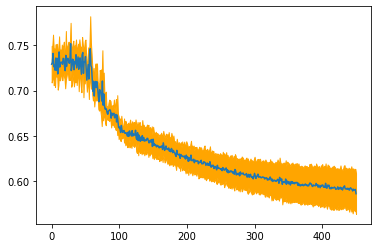

In [80]:
mean_epoch = result['Mean default training losses']
std_epoch = result['Default training losses'].std(0)
plt.plot(mean_epoch)
plt.fill_between(np.arange(len(mean_epoch)), mean_epoch - std_epoch, mean_epoch + std_epoch,color='orange')

In [73]:
with open('results/bc_qrac_record.pk', 'rb') as f:
    prev_result = pickle.load(f)

In [75]:
prev_result['acc_f1s_test']

[(0.6551724137931034, 0.4117647058823529),
 (0.7719298245614035, 0.6060606060606061),
 (0.6842105263157895, 0.47058823529411764),
 (0.631578947368421, 0.46153846153846156),
 (0.7719298245614035, 0.6486486486486486)]

In [76]:
prev_result['acc_f1s_train']

[(0.7236842105263158, 0.5655172413793104),
 (0.7030567685589519, 0.5211267605633804),
 (0.7336244541484717, 0.5611510791366906),
 (0.7248908296943232, 0.5467625899280576),
 (0.7336244541484717, 0.5547445255474452)]

In [ ]:


# Preparing data
X, y = X_df[selected_features].values, y_df.values
X_binary_encoded = binary_encoder(X)

# Preparing inputs for feeding VQC
num_qubit = len(X_binary_encoded[0])//3
# Custom Feature Map
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 4)
backend = QasmSimulator({"method": "statevector_gpu"})

# Test Run VQC (CustomFeatureMap)
seed, epoch = 10598, 200
optimizer = lambda: SPSA(epoch)
result = kfold_vqc(feature_map, \
                    var_form, \
                    backend, \
                    optimizer, \
                    seed, \
                    X_binary_encoded, y, \
                    'models/self_learn_encoder_model.zip', \
                    'results/self_learn_encoder_results.pkl', \
                    k=5)